In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive    
 
drive.mount('/content/drive')

Mounted at /content/drive


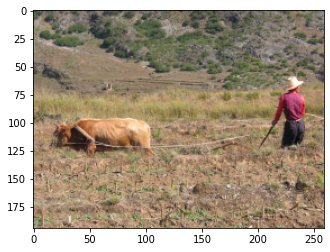

In [3]:
img=cv2.imread('/content/drive/MyDrive/hi.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
from numpy.linalg import norm
def PP(a,l=5,s=5):
    x = np.arange(0,a.shape[1]-s+1,1)
    y = np.arange(0,a.shape[0]-s+1,1)
    x,y = np.meshgrid(x,y)
    return x.flatten(),y.flatten()
def patches(a,x,y,l=5):
    g = len(x) ; lis = np.asarray([])
    for i in range(g):
        if i==0:
            lis=a[y[i]:y[i]+l,x[i]:x[i]+l].flatten()
        if i!=0:
            lis=np.vstack((lis,a[y[i]:y[i]+l,x[i]:x[i]+l].flatten()))
    return lis
def NCC_best_patch1(a,b,l=5,s=5):
    
    x1,y1 = PP(a,l,s) ; lis1 = patches(a,x1,y1,l)
    x2,y2 = PP(b,l,s) ; lis2 = patches(b,x2,y2,l)    
    d={}
    ans=[]
    ans1=[]
    lis1 = lis1-np.mean(lis1,axis=1).reshape(-1,1) ; lis1 = lis1/(norm(lis1,axis=1).reshape(-1,1)+0.1)
    lis2 = lis2-np.mean(lis2,axis=1).reshape(-1,1) ; lis2 = lis2/(norm(lis2,axis=1).reshape(-1,1)+0.1)
    for i in lis1:
      if(len(ans)%1000==0): print('*',end="")
      here=np.sum((lis2*i),axis=1)
      ans.append(np.argmax(here))
      ans1.append(1-np.max(here))
    for i in range(len(x1)):
        d[(y1[i],x1[i])]=(y2[ans[i]],x2[ans[i]])
    print()
    return d,np.sum(np.array(ans1))
def NCC_best_patch2(a,b,l=5,s=5):
    
    x1,y1 = PP(a,l,s) ; lis1 = patches(a,x1,y1,l)
    x2,y2 = PP(b,l,s) ; lis2 = patches(b,x2,y2,l)    
    d={}
    ans=[]
    ans1=[]
    lis1 = lis1-np.mean(lis1,axis=1).reshape(-1,1) ; lis1 = lis1/(norm(lis1,axis=1).reshape(-1,1)+0.1)
    lis2 = lis2-np.mean(lis2,axis=1).reshape(-1,1) ; lis2 = lis2/(norm(lis2,axis=1).reshape(-1,1)+0.1)
    for i in lis1:
      if(len(ans)%1000==0): print('*',end="")
      here=np.sum((lis2*i),axis=1)
      ans.append(np.argmax(here))
      ans1.append(1-np.max(here))
    for i in range(len(x1)):
        d[(y2[ans[i]],x2[ans[i]])]=(y1[i],x1[i])
    print()
    return d,np.sum(np.array(ans1))
def NCC_best_patch11(a,b,l=5,s=5):
    x1,y1 = PP(a,l,s) ; lis1 = patches(a,x1,y1,l)
    x2,y2 = PP(b,l,s) ; lis2 = patches(b,x2,y2,l) 
    #print(lis1.shape,lis2.shape)   
    d={}
    ans=[]
    ans1=[]
    for i in lis1:
        if(len(ans)%1000==0):
          print('*',end="")
        here=np.sum(lis2-i,axis=1)
        ans.append(np.argmin(here))
        ans1.append(np.min(here))
    for i in range(len(x1)):
        d[(y1[i],x1[i])]=(y2[ans[i]],x2[ans[i]])
    ans1=np.array(ans1)
    return d,np.sum(ans1**2)/ans1.shape
def NCC_best_patch21(a,b,l=5,s=5):
    x1,y1 = PP(a,l,s) ; lis1 = patches(a,x1,y1,l)
    x2,y2 = PP(b,l,s) ; lis2 = patches(b,x2,y2,l)    
    d={}
    ans=[]
    ans1=[]    
    for i in lis1:
        if(len(ans)%1000==0):
          print('*',end="")
        here=np.sum(lis2-i,axis=1)
        ans.append(np.argmin(here))
        ans1.append(np.min(here))
    for i in range(len(x1)):
        d[(y2[ans[i]],x2[ans[i]])]=(y1[i],x1[i])
    ans1=np.array(ans1)
    return d,np.sum(ans1**2)/ans1.shape

********************************************
1663.5010877740856
*************************************************
2139.037419240702


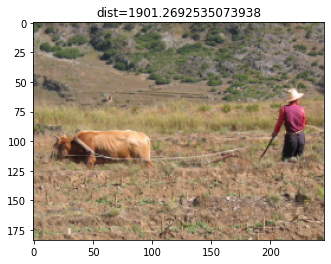

****************************************
1353.2514484673468
********************************************
1719.5695861365593


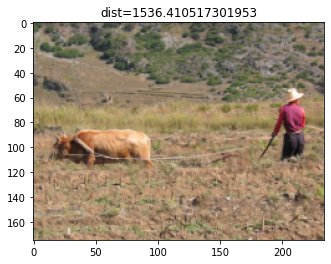

************************************
1094.859408270586
****************************************
1405.8699227539269


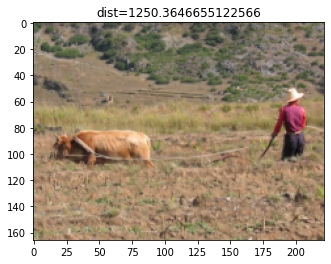

********************************
830.5488447611584
************************************
1026.8490554467608


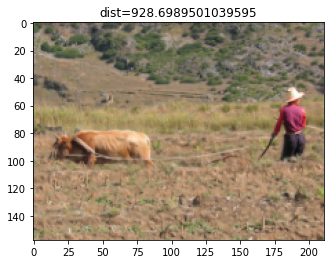

*****************************
709.0589462586083
********************************
905.8347753302621


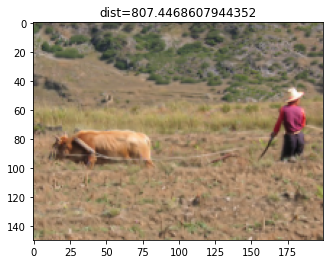

**************************
573.0811475649293
*****************************
714.2090540246008


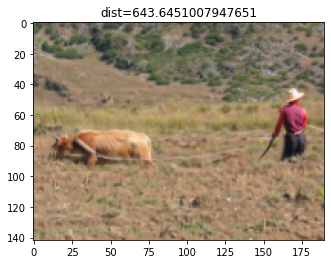

************************
506.86564804938234
**************************
629.6585729552588


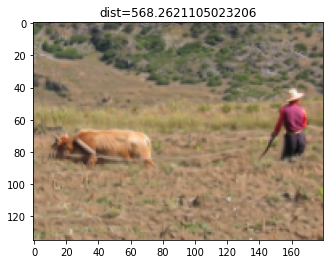

*********************
428.5151079783337
************************
523.5397988188937


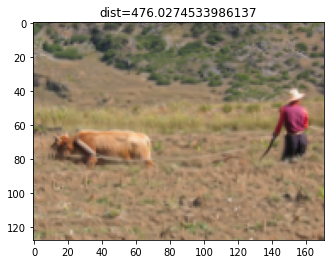

*******************
346.6826464629995
*********************
424.5823388785902


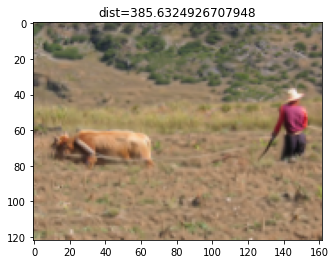

*****************
299.9057410427864
*******************
365.17021302699214


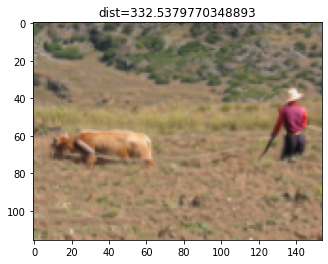

****************
269.73237808384584
*****************
326.6353912176784


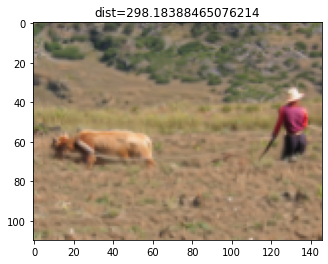

**************
240.20962005706414
****************
292.54805898306296


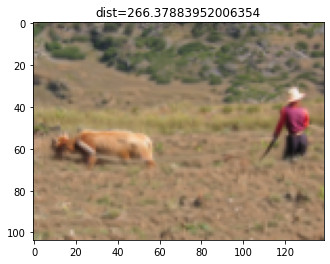

*************
212.3003649591576
**************
254.29980927392543


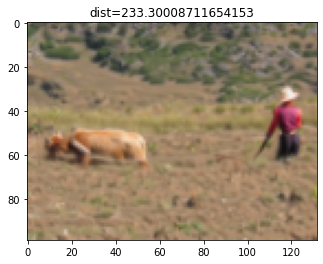

***********
184.44970213629975
*************
223.56883888452546


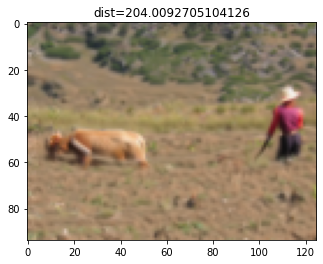

**********
166.97497044511442
***********
203.08169805365608


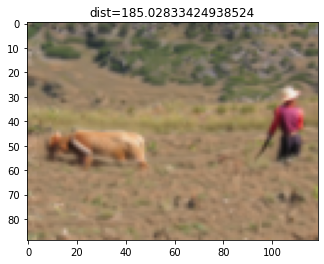

*********
141.83940961487005
**********
171.16039221071122


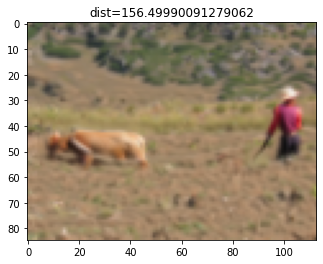

********
125.38922420066812
*********
152.72747854602815


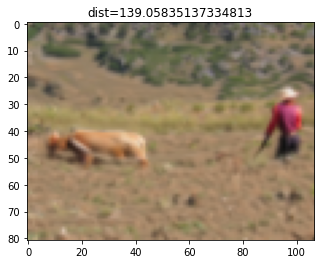

********
112.95357612547484
********
135.72114001862946


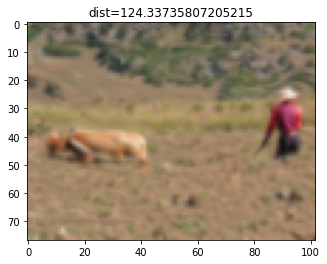

*******
103.75831301580641
********
124.81760079977589


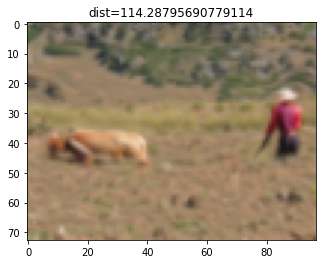

******
87.8760302203911
*******
104.83520801938933


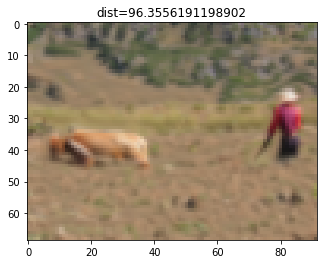

In [5]:
S=cv2.imread('/content/drive/MyDrive/hi.png')
#S=cv2.resize(S,(150,150))
S=cv2.cvtColor(S,cv2.COLOR_BGR2RGB)
T=S.copy()
T_array=[]
dist=0
T_array.append((T,0))
#window size=7*7 always
for _ in range(20):
    T=cv2.resize(T,None,fx=0.95,fy=0.95)
    out=T.copy()
    match1,me1=NCC_best_patch1(T,S)
    print(me1)
    match2,me2=NCC_best_patch2(S,T)
    print(me2)
    dist=(me1+me2)/2
    for i in range(T.shape[0]):
        for j in range(T.shape[1]):
            cnt1=0
            sum1=np.array([0,0,0])
            cnt2=0
            sum2=np.array([0,0,0])
            for x in range(5): 
                for y in range(5):
                    try :
                        here=match1[(i-x,j-y)]
                        sum1=sum1+S[here[0]+x,here[1]+y]
                        cnt1=cnt1+1
                    except :
                        continue
            for x in range(5):
                for y in range(5):
                    try :
                        here=match2[(i-x,j-y)]
                        sum2=sum2+S[here[0]+x,here[1]+y]
                        cnt2=cnt2+1
                    except :
                        continue
            out[i,j]=np.array((sum1+sum2)/(cnt1+cnt2),int)
    T=out.copy()
    plt.title('dist='+str(dist))
    plt.imshow(T)
    T_array.append((T,dist))
    plt.show()
    S=T.copy()

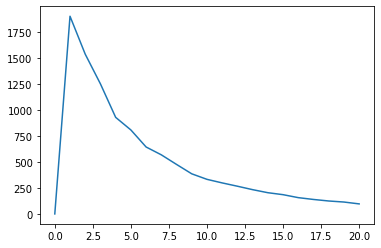

In [6]:
dist=[]
for i in T_array:
  dist.append(i[1])
plt.plot(dist)

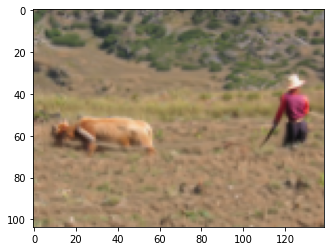

In [7]:
plt.imshow(T_array[12][0])